# For Experiment 2:
## Create PSD figures, including aperiodic signal

##### We need to make a PSD's and their aperiodic signal for every timestamp (baseline and retention), lateralization (ipsi vs contra), and do this for each performance (good vs poor).


## NOTE: frequency axis is not 1,2,3 but slightly different. Therefore, indexing [2:40] does not mean using frequency 2 to 40. But now you're using 2.72Hz until 35 Hz. Something to keep in mind and discuss

### Importing libraries & Dataset + settings|


In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Default figure size larger! 
figure = {'figsize': (13,8)}
plt.rc('figure', **figure)
sns.set_context('talk', font_scale=1.2)
fs = 24

In [2]:
# Load the PSDs
#  PSD_exp1_dataframe[ppn, freq_axis, performance, lateralization, timeperiod]
#  freq_axis: 35 stamps of frequencies
#  performance: 0 = poor, 1 = good
#  lateralization: 0 = contra, 1 = ipsi
# timeperiod: 0 = baseline, 1 = retention

PSD_dataframe_alpha = np.load('../saved_files/fooof_results/exp2_output/main_analysis/alpha_exp2_psd.npy')
PSD_dataframe_no_alpha = np.load('../saved_files/fooof_results/exp2_output/main_analysis/no_alpha_exp2_psd.npy')
PSD_dataframe_theta = np.load('../saved_files/fooof_results/exp2_output/main_analysis/theta_exp2_psd.npy')
PSD_dataframe_no_theta = np.load('../saved_files/fooof_results/exp2_output/main_analysis/no_theta_exp2_psd.npy')
# PSD_dataframe_all_theta = np.load('../saved_files/fooof_results/exp2_output/theta_all_exp2_psd.npy')

# Load x-axis (frequencies)
x_axis = np.load('../saved_files/FOOOF_results/exp2_output/main_analysis/freq_x_axis.npy')

# Plotting alpha vs. no alpha groups


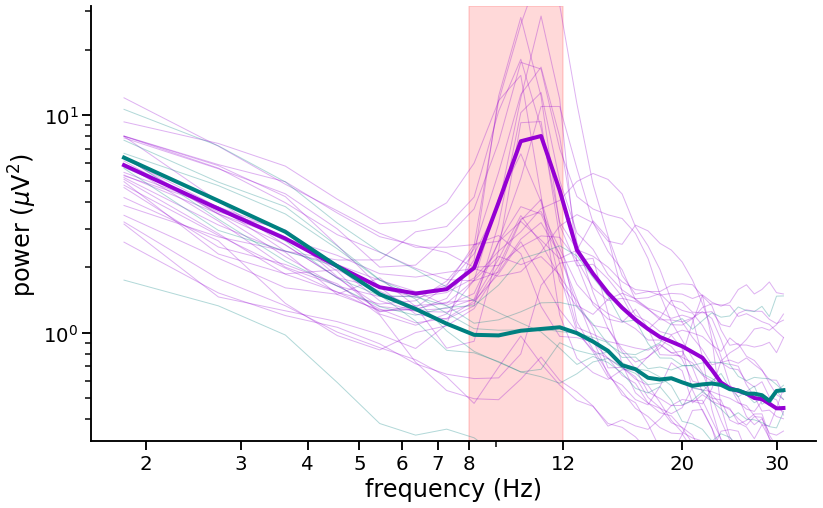

In [3]:
# Get average baseline and average psd over good and poor performance for retention period
# [ppn, freq_axis, performance, lateralization, timeperiod]
# freq_axis: 138 stamps of frequencies
# performance: 0 = poor, 1 = good
# lateralization: 0 = contra, 1 = ipsi
# timeperiod: 0 = baseline, 1 = retention

# only plot retention period
alpha_avg_sub_perf_lat = np.mean(PSD_dataframe_alpha[:,:,:,:,1], axis = (0,2,3))
alpha_avg_perf_lat = np.mean(PSD_dataframe_alpha[:,:,:,:,1], axis = (2,3))
no_alpha_avg_sub_perf_lat = np.mean(PSD_dataframe_no_alpha[:,:,:,:,1], axis = (0,2,3))
no_alpha_avg_perf_lat = np.mean(PSD_dataframe_no_alpha[:,:,:,:,1], axis = (2,3))


# plot line per ppn
for ppn_with in range(len(alpha_avg_perf_lat)):
    plt.loglog(x_axis[2:35], alpha_avg_perf_lat[ppn_with][2:35], 'darkviolet', alpha = 0.3, linewidth = 1)

for ppn_wo in range(len(no_alpha_avg_perf_lat)):
    plt.loglog(x_axis[2:35], no_alpha_avg_perf_lat[ppn_wo][2:35], 'teal', alpha = 0.3, linewidth = 1)

# plot averages
plt.loglog(x_axis[2:35], alpha_avg_sub_perf_lat[2:35], 'darkviolet', linewidth = 4, label = "alpha")
plt.loglog(x_axis[2:35], no_alpha_avg_sub_perf_lat[2:35], 'teal', linewidth = 4, label = "no alpha")

plt.axvspan(8, 12, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7, 8, 12, 20, 30], labels=['2', '3', '4', '5', '6', '7', '8', '12', '20', '30'])
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
# plt.ylim((10**-1,12**2))
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.title('Average PSD per ppn with ALPHA or NO_ALPHA osc. (avg poor and good performance) during retention period')

plt.savefig('../figures/exp2_figures/figx_exp2_alpha_proof.tiff', format='tiff')

plt.show()

# Ploting Alpha Group: Poor vs. Good Performance

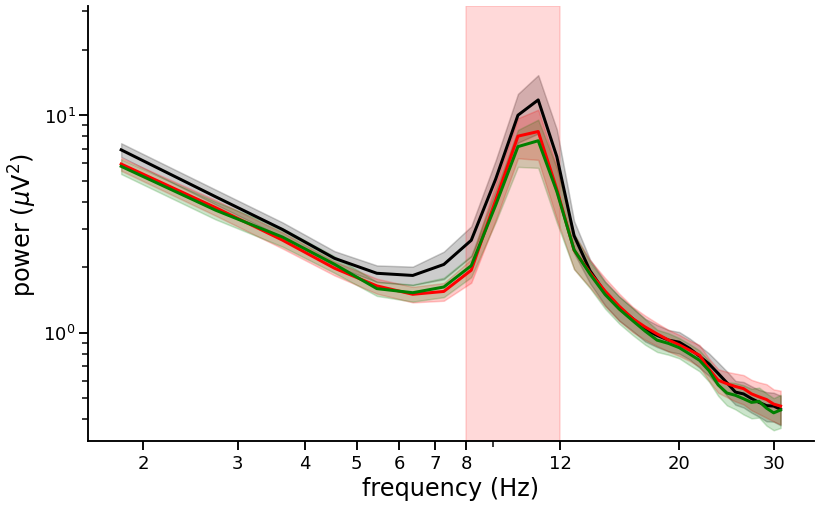

In [4]:
# Average over lateralization
# [ppn, freq_axis, performance, lateralization, timeperiod]
alpha_avlat = PSD_dataframe_alpha.mean(axis=3)

# Calculate mean
mean_poor = alpha_avlat[:, 2:35, 0, 1].mean(axis=0)
mean_good = alpha_avlat[:, 2:35, 1, 1].mean(axis=0)
baseline = alpha_avlat[:, 2:35, :, 0].mean(axis=(0,2))

# Calculate standard error of the mean
sem_poor = sp.stats.sem(alpha_avlat[:, 2:35, 0, 1])
sem_good = sp.stats.sem(alpha_avlat[:, 2:35, 1, 1])
sem_bas = sp.stats.sem(alpha_avlat[:, 2:35, :, 0].mean(axis=2))

plt.loglog(x_axis[2:35], baseline, color = 'k', lw = 3, label = 'baseline')
plt.fill_between(x_axis[2:35], baseline-sem_bas, baseline+sem_bas, color = 'k', alpha = 0.2)

plt.loglog(x_axis[2:35], mean_poor, 'r', label = 'poor', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_poor-sem_poor, mean_poor+sem_poor, color = 'r', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_good, 'g', label = 'good', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_good-sem_good, mean_good+sem_good, color = 'g', alpha = 0.2)

plt.axvspan(8, 12, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7, 8, 12, 20, 30], labels=['2', '3', '4', '5', '6', '7', '8', '12', '20', '30'])
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.title('Average PSD per ppn for ALPHA during retention period per performance')

plt.savefig('../figures/exp2_figures/fig3_exp2_alpha_performance.tiff', format='tiff')

plt.show()

## Plotting theta vs no theta groups

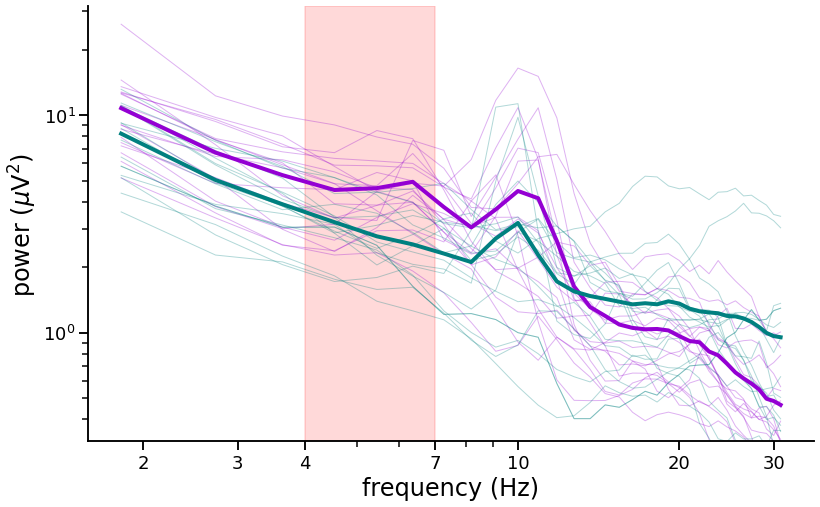

In [5]:
# From retention period, get average psd over good and poor performance
# [ppn, freq_axis, performance, timeperiod]

# only plot retention period
theta_avg_perf = np.mean(PSD_dataframe_theta[:,:,:,1], axis = 2)
theta_avg_sub_perf = np.mean(theta_avg_perf, axis = 0)
no_theta_avg_perf = np.mean(PSD_dataframe_no_theta[:,:,:,1], axis = 2)
no_theta_avg_sub_perf = np.mean(no_theta_avg_perf, axis = 0)


# plot line per ppn
for ppn_with in range(len(theta_avg_perf)):
    plt.loglog(x_axis[2:35], theta_avg_perf[ppn_with][2:35], 'darkviolet', alpha = 0.3, linewidth = 1)

for ppn_wo in range(len(no_theta_avg_perf)):
    plt.loglog(x_axis[2:35], no_theta_avg_perf[ppn_wo][2:35], 'teal', alpha = 0.3, linewidth = 1)

# plot average per theta and no theta group
plt.loglog(x_axis[2:35], theta_avg_sub_perf[2:35], 'darkviolet', linewidth = 4, label = "theta")
plt.loglog(x_axis[2:35], no_theta_avg_sub_perf[2:35], 'teal', linewidth = 4, label = "no theta")

plt.axvspan(4, 7, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(ticks=[2, 3, 4, 7, 10, 20, 30], labels=['2', '3', '4', '7', '10', '20', '30'])
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.title('Average PSD per ppn for THETA and NO_THETA during retention period')

plt.savefig('../figures/exp2_figures/figx_exp2_theta_proof_loglog.tiff', format='tiff')

plt.show()

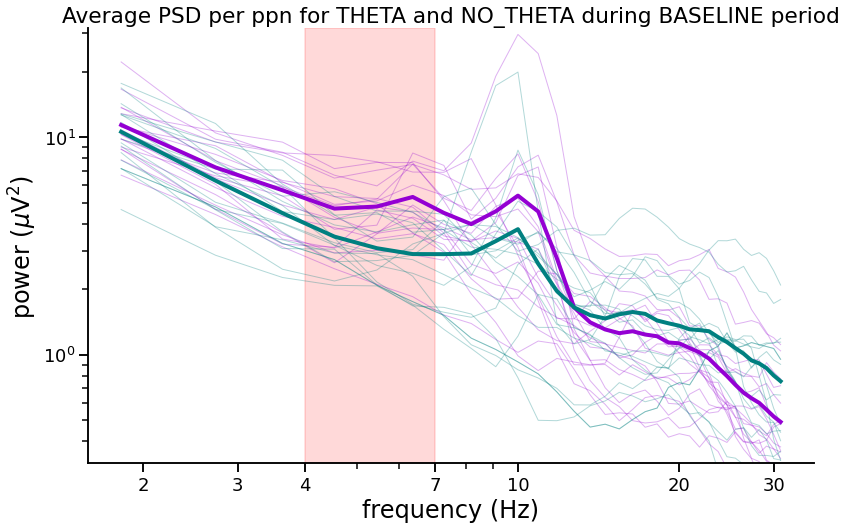

In [6]:
# From retention period, get average psd over good and poor performance
# [ppn, freq_axis, performance, timeperiod]

# only plot retention period
theta_avg_perf = np.mean(PSD_dataframe_theta[:,:,:,0], axis = 2)
theta_avg_sub_perf = np.mean(theta_avg_perf, axis = 0)
no_theta_avg_perf = np.mean(PSD_dataframe_no_theta[:,:,:,0], axis = 2)
no_theta_avg_sub_perf = np.mean(no_theta_avg_perf, axis = 0)


# plot line per ppn
for ppn_with in range(len(theta_avg_perf)):
    plt.loglog(x_axis[2:35], theta_avg_perf[ppn_with][2:35], 'darkviolet', alpha = 0.3, linewidth = 1)

for ppn_wo in range(len(no_theta_avg_perf)):
    plt.loglog(x_axis[2:35], no_theta_avg_perf[ppn_wo][2:35], 'teal', alpha = 0.3, linewidth = 1)

# plot average per theta and no theta group
plt.loglog(x_axis[2:35], theta_avg_sub_perf[2:35], 'darkviolet', linewidth = 4, label = "theta")
plt.loglog(x_axis[2:35], no_theta_avg_sub_perf[2:35], 'teal', linewidth = 4, label = "no theta")

plt.axvspan(4, 7, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(ticks=[2, 3, 4, 7, 10, 20, 30], labels=['2', '3', '4', '7', '10', '20', '30'])
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Average PSD per ppn for THETA and NO_THETA during BASELINE period')

# plt.savefig('../figures/exp2_figures/figx_exp2_theta_proof_loglog.tiff', format='tiff')

plt.show()

## plotting theta group: poor vs good performance

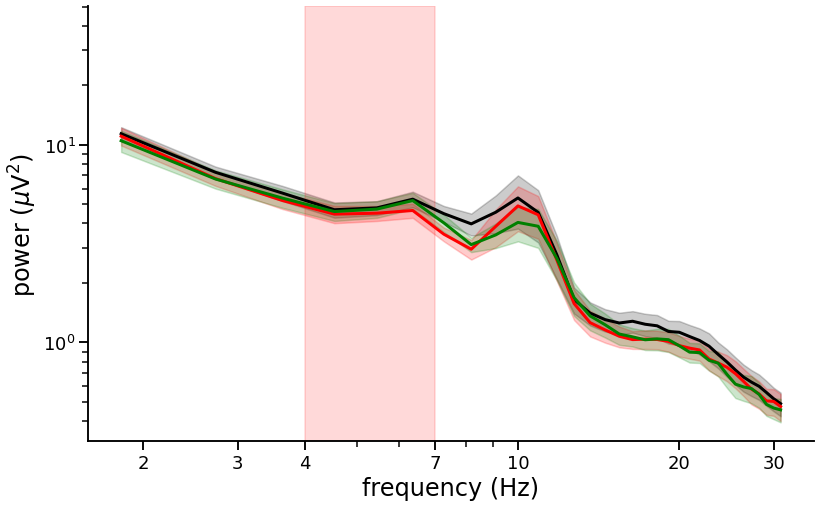

In [7]:
# PSD_dataframe_theta [ppn, freq_axis, performance, timeperiod]

# Calculate mean
mean_poor = PSD_dataframe_theta[:, 2:35, 0, 1].mean(axis=0)
mean_good = PSD_dataframe_theta[:, 2:35, 1, 1].mean(axis=0)
baseline = PSD_dataframe_theta[:, 2:35, :, 0].mean(axis=(0,2))

# Calculate standard error of the mean
sem_poor = sp.stats.sem(PSD_dataframe_theta[:, 2:35, 0, 1])
sem_good = sp.stats.sem(PSD_dataframe_theta[:, 2:35, 1, 1])
sem_bas = sp.stats.sem(PSD_dataframe_theta[:, 2:35, :, 0].mean(axis=2))

plt.loglog(x_axis[2:35], baseline, color = 'k', lw = 3, label = 'baseline')
plt.fill_between(x_axis[2:35], baseline-sem_bas, baseline+sem_bas, color = 'k', alpha = 0.2)

plt.loglog(x_axis[2:35], mean_poor, 'r', label = 'poor', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_poor-sem_poor, mean_poor+sem_poor, color = 'r', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_good, 'g', label = 'good', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_good-sem_good, mean_good+sem_good, color = 'g', alpha = 0.2)

plt.axvspan(4, 7, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.7)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(ticks=[2, 3, 4, 7, 10, 20, 30], labels=['2', '3', '4', '7', '10', '20', '30'])
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.title('Average PSD per ppn for THETA during retention period per performance')

t, l = plt.xticks()

plt.savefig('../figures/exp2_figures/fig3_exp2_theta_performance_loglog.tiff', format='tiff')

plt.show()

##### plotting NO theta group: poor vs good performance


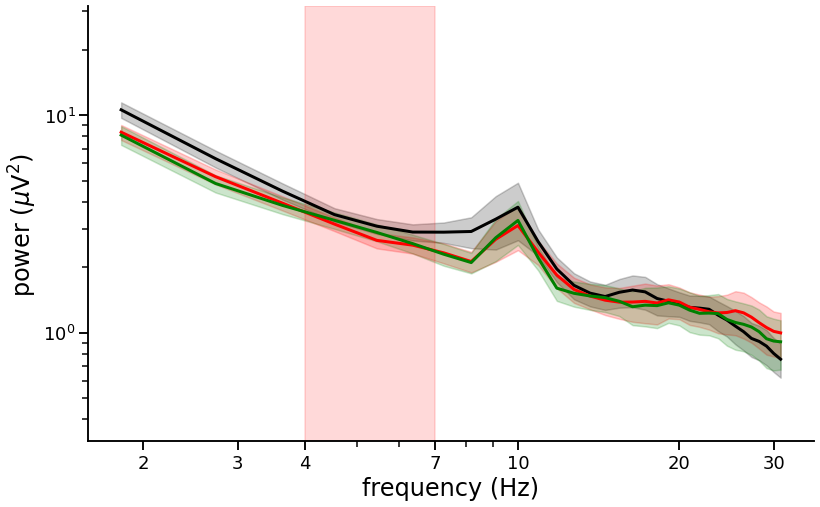

In [8]:
# PSD_dataframe_no_theta [ppn, freq_axis, performance, timeperiod]
# Calculate mean
mean_poor = PSD_dataframe_no_theta[:, 2:35, 0, 1].mean(axis=0)
mean_good = PSD_dataframe_no_theta[:, 2:35, 1, 1].mean(axis=0)
baseline = PSD_dataframe_no_theta[:, 2:35, :, 0].mean(axis=(0,2))

# Calculate standard error of the mean
sem_poor = sp.stats.sem(PSD_dataframe_no_theta[:, 2:35, 0, 1])
sem_good = sp.stats.sem(PSD_dataframe_no_theta[:, 2:35, 1, 1])
sem_bas = sp.stats.sem(PSD_dataframe_no_theta[:, 2:35, :, 0].mean(axis=2))

plt.loglog(x_axis[2:35], baseline, color = 'k', lw = 3, label = 'baseline')
plt.fill_between(x_axis[2:35], baseline-sem_bas, baseline+sem_bas, color = 'k', alpha = 0.2)

plt.loglog(x_axis[2:35], mean_poor, 'r', label = 'poor', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_poor-sem_poor, mean_poor+sem_poor, color = 'r', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_good, 'g', label = 'good', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_good-sem_good, mean_good+sem_good, color = 'g', alpha = 0.2)

plt.axvspan(4, 7, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(ticks=[2, 3, 4, 7, 10, 20, 30], labels=['2', '3', '4', '7', '10', '20', '30'])
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.title('Average PSD per ppn for NO THETA during retention period per performance')

plt.savefig('../figures/exp2_figures/fig3_exp2_no_theta_performance.tiff', format='tiff')

plt.show()

## All subjects for theta/no theta to see exponent

In [9]:
# First combine theta and no theta psds's
print(PSD_dataframe_theta.shape)
print(PSD_dataframe_no_theta.shape)

PSD_dataframe_all = np.vstack([PSD_dataframe_theta, PSD_dataframe_no_theta])
print(PSD_dataframe_all.shape)

(17, 138, 2, 2)
(17, 138, 2, 2)
(34, 138, 2, 2)


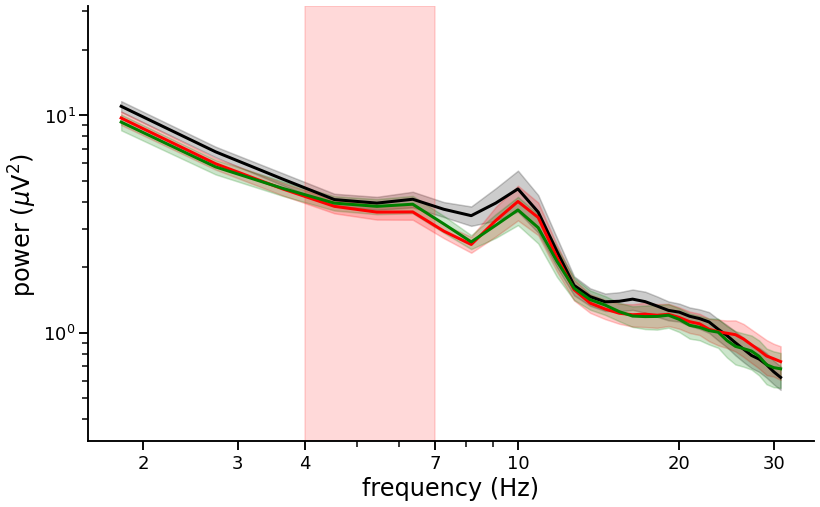

In [10]:
# PSD_dataframe_no_theta [ppn, freq_axis, performance, timeperiod]
# Calculate mean
mean_poor = PSD_dataframe_all[:, 2:35, 0, 1].mean(axis=0)
mean_good = PSD_dataframe_all[:, 2:35, 1, 1].mean(axis=0)
baseline = PSD_dataframe_all[:, 2:35, :, 0].mean(axis=(0,2))

# Calculate standard error of the mean
sem_poor = sp.stats.sem(PSD_dataframe_all[:, 2:35, 0, 1])
sem_good = sp.stats.sem(PSD_dataframe_all[:, 2:35, 1, 1])
sem_bas = sp.stats.sem(PSD_dataframe_all[:, 2:35, :, 0].mean(axis=2))

plt.loglog(x_axis[2:35], baseline, color = 'k', lw = 3, label = 'baseline')
plt.fill_between(x_axis[2:35], baseline-sem_bas, baseline+sem_bas, color = 'k', alpha = 0.2)

plt.loglog(x_axis[2:35], mean_poor, 'r', label = 'poor', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_poor-sem_poor, mean_poor+sem_poor, color = 'r', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_good, 'g', label = 'good', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_good-sem_good, mean_good+sem_good, color = 'g', alpha = 0.2)

plt.axvspan(4, 7, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(ticks=[2, 3, 4, 7, 10, 20, 30], labels=['2', '3', '4', '7', '10', '20', '30'])

plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.title('Average PSD per ppn for NO THETA during retention period per performance')

plt.savefig('../figures/exp2_figures/fig3_exp2_all_theta_performance.tiff', format='tiff')

plt.show()